In [2]:
from IPython.display import display, HTML

# Reemplaza "usuario/repositorio" y "nombre_del_cuaderno.ipynb" con la URL de tu archivo en GitHub
github_url = "https://github.com/pabanib/Cursos/blob/master/Temporal/1-temporal.ipynb"

# Crea el botón
button_html = f'<a href="{github_url}" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a>'
display(HTML(button_html))


 # **<font color="lightblue">Manejo de fechas con Python y Pandas</font>**

<p align="justify">
Las series temporales son puntos de datos recopilados a lo largo del tiempo. Por lo general, el tiempo está espaciado de manera uniforme entre cada punto de datos. Sin embargo, puede haber brechas en las observaciones. Pandas incluye funcionalidades para manipular fechas, realizar agregaciones en diferentes períodos de tiempo, muestrear diferentes intervalos de tiempo y más.
<br><br>
Antes de meternos con Pandas y como trabajar las series veremos el objeto principal que debemos aprender a manipular que es el datetime. En realidad se pueden tener tres tipos de  objetos que son <code>date</code>, <code>time</code> y <code>datetime</code>.
<br><br>
Por otro lado, Pandas tiene encapsulado los <code>date</code> y <code>time</code> en un tipo de objeto denominado <code>Timestamp</code>. Y con Numpy podemos ver los objetos datetime64 como tipo de datos, sin embargo todos tienen funciones similares.



In [1]:
import pandas as pd
import numpy as np
import datetime

c:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
date = datetime.date(year = 2023, month = 8, day = 20)
time = datetime.time(hour = 12, minute = 30, second = 19, microsecond = 463198)
dt = datetime.datetime(year = 2023, month = 8, day = 20, hour = 12, minute = 30, second = 18)

print(f"La fecha es {date}")


La fecha es 2023-08-20


In [3]:
print(f"La hora es {time}")

La hora es 12:30:19.463198


In [4]:
print(f"la fecha y hora es {dt}")

la fecha y hora es 2023-08-20 12:30:18


👀 También podemos construir lapsos de tiempo con el objeto <code>timedelta</code>

In [5]:
td = datetime.timedelta(weeks = 2, days = 5, hours = 10 , minutes = 20)
td

datetime.timedelta(days=19, seconds=37200)

👀 Este objeto ahora se lo podemos sumar a cualquier fecha que ya tengamos.

In [6]:
print(f"La nueva fecha es {dt+td}")

La nueva fecha es 2023-09-08 22:50:18


<p align="justify">
Vamos a dirigirnos a pandas y su objeto <code>Timestamp</code>, que es un momento en el tiempo con una precisión de nanosegundos. El constructor de Timestamp es muy flexible y maneja una amplia variedad de entradas.

In [7]:
pd.Timestamp(year = 2023, month = 2, day = 3, hour = 5, minute = 10)

Timestamp('2023-02-03 05:10:00')

In [8]:
pd.Timestamp('2023-06-03')

Timestamp('2023-06-03 00:00:00')

In [9]:
pd.Timestamp('2022-05/10')

Timestamp('2022-05-10 00:00:00')

In [10]:
pd.Timestamp('June 6, 2023, 20:45.55')

Timestamp('2023-06-06 20:45:33')

<p align="justify">
Pandas tambien tiene la función <code>to_Timestamp</code> que también tiene alta flexibilidad con algunas funciones más. Y esta función puede convertir series enteras a datos de tipo datetime

In [11]:
s = pd.Series(['12-5-2015', '14-1-2013','20/12/2017', '40/23/2017'])
pd.to_datetime(s, dayfirst = True, errors = 'coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

<p align="justify">
Al igual que el constructor de <code>Timestamp</code> y la función <code>to_datetime</code>, pandas cuenta con <code>Timedelta</code> y <code>to_timedelta</code> para representar una cantidad de tiempo. Tanto el constructor <code>Timedelta</code> como la función <code>to_timedelta</code> pueden crear un objeto <code>Timedelta</code> único.
<br><br>
Similar a <code>to_datetime</code>, <code>to_timedelta</code> tiene un poco más de funcionalidad y puede convertir listas completas o Series en objetos Timedelta:

In [12]:
 pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456789')

In [13]:
 pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [14]:
s = pd.Series([10, 100])

pd.to_timedelta(s, unit='s')

0   0 days 00:00:10
1   0 days 00:01:40
dtype: timedelta64[ns]

In [15]:
pd.to_timedelta(s, unit = 'd')

0    10 days
1   100 days
dtype: timedelta64[ns]

 ## **<font color="lightblue">Seleccionando periodos</font>**


<p align="justify">
De la manera que venimos viendo podemos seleccionar periodos y agrupar pero cuando el índice de nuestra serie pasa a ser un <code>DatetimeIndex </code> hay mejores oportunidades para seleccionar y se realiza de manera más eficiente.
<br><br>
Vamos a leer un dataset que corresponde a pagos electrónicos capturados en los últimso meses.


In [16]:
url = "https://raw.githubusercontent.com/pabanib/dataframes/master/pagos.csv"
pagos = pd.read_csv(url, sep = ';')
pagos.dtypes

CodiPaon      int64
ServPaon     object
PeriBole      int64
NumeBole      int64
NumeOper     object
ImpoPaon     object
CodiMepa      int64
TipoEnvio    object
ConvPaon     object
FechPaon     object
ActuPaon      int64
FeacPaon     object
UsacPoan     object
AltaPago     object
BajaFeho     object
BajaUsua     object
dtype: object

In [17]:
pagos.head()

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,FechPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
0,100242847,epagos,2023,283756,202300283756,"3925,74",26,P,7088,5/7/2023 00:00,1,\N,NaN,5/7/2023 11:22,\N,\N
1,125410306,epagos,2023,460684,202300460684,"4486,5",1,P,1088,6/7/2023 15:08,1,7/7/2023 06:14,rsoria,6/7/2023 15:05,\N,\N
2,125410329,epagos,2023,460698,202300460698,"6825,4",44,P,9088,2/7/2023 00:00,1,4/7/2023 05:37,sonia,2/7/2023 01:38,\N,\N
3,125410464,epagos,2023,460818,202300460818,5832,38,P,5088,31/7/2023 00:00,1,1/8/2023 05:38,rsoria,31/7/2023 15:31,\N,\N
4,125410484,epagos,2023,460832,202300460832,"5635,8",1,P,1088,4/8/2023 14:40,1,6/8/2023 19:30,sonia,4/8/2023 14:37,\N,\N


<p align="justify">
Como vemos, nuestros datos no han interpretado las fechas y horas como si fuera un <code>datetime</code> por lo tanto vamos a tener que transformarlas

In [18]:
pagos.ImpoPaon = pagos.ImpoPaon.apply(lambda x: float(x.replace(',','.')))

In [19]:

for k, t in pagos.dtypes.items():
  if t == 'object':
    try:
      s = pd.to_datetime(pagos[k], dayfirst = True)
      pagos[k] = s
    except:
      pass
pagos.dtypes

CodiPaon              int64
ServPaon             object
PeriBole              int64
NumeBole              int64
NumeOper             object
ImpoPaon            float64
CodiMepa              int64
TipoEnvio            object
ConvPaon             object
FechPaon     datetime64[ns]
ActuPaon              int64
FeacPaon             object
UsacPoan             object
AltaPago     datetime64[ns]
BajaFeho             object
BajaUsua             object
dtype: object

In [20]:
pagos.head()

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,FechPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
0,100242847,epagos,2023,283756,202300283756,3925.74,26,P,7088,2023-07-05 00:00:00,1,\N,NaN,2023-07-05 11:22:00,\N,\N
1,125410306,epagos,2023,460684,202300460684,4486.50,1,P,1088,2023-07-06 15:08:00,1,7/7/2023 06:14,rsoria,2023-07-06 15:05:00,\N,\N
2,125410329,epagos,2023,460698,202300460698,6825.40,44,P,9088,2023-07-02 00:00:00,1,4/7/2023 05:37,sonia,2023-07-02 01:38:00,\N,\N
3,125410464,epagos,2023,460818,202300460818,5832.00,38,P,5088,2023-07-31 00:00:00,1,1/8/2023 05:38,rsoria,2023-07-31 15:31:00,\N,\N
4,125410484,epagos,2023,460832,202300460832,5635.80,1,P,1088,2023-08-04 14:40:00,1,6/8/2023 19:30,sonia,2023-08-04 14:37:00,\N,\N


<p align="justify">
Podemos cambiar el índice del df para llegar a acceder a mejores formas de trabajo.

In [21]:
pagos = pagos.set_index('FechPaon')
pagos.head()

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-05 00:00:00,100242847,epagos,2023,283756,202300283756,3925.74,26,P,7088,1,\N,NaN,2023-07-05 11:22:00,\N,\N
2023-07-06 15:08:00,125410306,epagos,2023,460684,202300460684,4486.50,1,P,1088,1,7/7/2023 06:14,rsoria,2023-07-06 15:05:00,\N,\N
2023-07-02 00:00:00,125410329,epagos,2023,460698,202300460698,6825.40,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 01:38:00,\N,\N
2023-07-31 00:00:00,125410464,epagos,2023,460818,202300460818,5832.00,38,P,5088,1,1/8/2023 05:38,rsoria,2023-07-31 15:31:00,\N,\N
2023-08-04 14:40:00,125410484,epagos,2023,460832,202300460832,5635.80,1,P,1088,1,6/8/2023 19:30,sonia,2023-08-04 14:37:00,\N,\N


<p align="justify">
Podemos ubicar una fecha precisa psando la fehca y hora correcta

In [22]:
pagos.loc['2023-07-02 00:00:00']

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-02,125410329,epagos,2023,460698,202300460698,6825.40,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 01:38:00,\N,\N
2023-07-02,125443273,epagos,2023,491838,202300491838,4680.00,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 23:39:00,\N,\N
2023-07-02,125597957,epagos,2023,601964,202300601964,4486.50,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 12:22:00,\N,\N
2023-07-02,125616501,epagos,2023,608320,202300608320,4680.00,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 06:20:00,\N,\N
2023-07-02,132996774,epagos,2023,707174,202300707174,9895.23,15,P,6088,1,4/7/2023 05:37,sonia,2023-07-02 11:24:00,\N,\N
2023-07-02,132997962,epagos,2023,707187,202300707187,5642.05,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 12:04:00,\N,\N
2023-07-02,132998100,epagos,2023,707192,202300707192,10526.30,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 12:08:00,\N,\N
2023-07-02,132998739,epagos,2023,707201,202300707201,5904.00,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 12:57:00,\N,\N
2023-07-02,132999250,epagos,2023,707207,202300707207,4778.28,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 12:58:00,\N,\N


<p align="justify">
O podemos buscar todos lo movimientos en una fecha, mes, año, etc.

In [23]:
pagos.loc['2023-07-02']

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-02 00:00:00,125410329,epagos,2023,460698,202300460698,6825.40,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 01:38:00,\N,\N
2023-07-02 18:20:00,125431169,epagos,2023,479296,202300479296,4680.00,15,P,1088,1,4/7/2023 05:37,sonia,2023-07-02 18:16:00,\N,\N
2023-07-02 00:00:00,125443273,epagos,2023,491838,202300491838,4680.00,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 23:39:00,\N,\N
2023-07-02 11:17:00,125558304,epagos,2023,584158,202300584158,5526.00,14,P,6088,1,4/7/2023 05:37,sonia,2023-07-02 11:14:00,\N,\N
2023-07-02 00:00:00,125597957,epagos,2023,601964,202300601964,4486.50,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 12:22:00,\N,\N
2023-07-02 00:00:00,125616501,epagos,2023,608320,202300608320,4680.00,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 06:20:00,\N,\N
2023-07-02 00:03:00,132992978,epagos,2023,707160,202300707160,14558.70,14,P,6088,1,4/7/2023 05:37,sonia,2023-07-02 00:00:00,\N,\N
2023-07-02 07:48:00,132994295,epagos,2023,707164,202300707164,4954.88,14,P,6088,1,4/7/2023 05:37,sonia,2023-07-02 07:45:00,\N,\N
2023-07-02 09:31:00,132994875,epagos,2023,707167,202300707167,24564.99,1,P,1088,1,4/7/2023 05:37,sonia,2023-07-02 09:28:00,\N,\N


In [24]:
pagos.loc['2023-07']

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-05 00:00:00,100242847,epagos,2023,283756,202300283756,3925.74,26,P,7088,1,\N,NaN,2023-07-05 11:22:00,\N,\N
2023-07-06 15:08:00,125410306,epagos,2023,460684,202300460684,4486.50,1,P,1088,1,7/7/2023 06:14,rsoria,2023-07-06 15:05:00,\N,\N
2023-07-02 00:00:00,125410329,epagos,2023,460698,202300460698,6825.40,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 01:38:00,\N,\N
2023-07-31 00:00:00,125410464,epagos,2023,460818,202300460818,5832.00,38,P,5088,1,1/8/2023 05:38,rsoria,2023-07-31 15:31:00,\N,\N
2023-07-29 00:00:00,125410495,epagos,2023,460842,202300460842,2070.00,1,P,1088,1,1/8/2023 05:36,rsoria,2023-07-29 15:00:00,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 21:05:00,235929652,macro,2023,736966,202300736966-20230731090258,9000.00,9,\N,\N,1,1/8/2023 05:39,rsoria,2023-07-31 21:01:00,\N,\N
2023-07-31 21:17:00,235931992,macro,2023,736970,202300736970-20230731091556,57451.63,8,\N,\N,1,1/8/2023 05:39,rsoria,2023-07-31 21:13:00,\N,\N
2023-07-31 21:34:00,235934335,macro,2023,736984,202300736984-20230731093222,5904.00,9,\N,\N,1,1/8/2023 05:39,rsoria,2023-07-31 21:30:00,\N,\N


<p align="justify">
Adicionalmente se puede seleccionar un rango de fechas utilizando los <code>:</code> entre las fechas que deseamos.

In [25]:
pagos.loc['2023-07-06':'2023-07-10'].sort_index()

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-06 00:00:00,133558804,epagos,2023,713452,202300713452,3567.21,44,P,9088,1,7/7/2023 06:15,rsoria,2023-07-06 16:54:00,\N,\N
2023-07-06 00:00:00,133762992,epagos,2023,713797,202300713797,2232.00,44,P,9088,1,7/7/2023 06:15,rsoria,2023-07-06 20:24:00,\N,\N
2023-07-06 00:00:00,133761803,epagos,2023,713792,202300713792,4680.00,44,P,9088,1,7/7/2023 06:15,rsoria,2023-07-06 20:22:00,\N,\N
2023-07-06 00:00:00,125474312,epagos,2023,523114,202300523114,4680.00,14,P,6088,1,7/7/2023 06:14,rsoria,2023-07-06 15:09:00,\N,\N
2023-07-06 00:00:00,133736303,epagos,2023,713721,202300713721,8049.43,6,P,7088,1,7/7/2023 06:15,rsoria,2023-07-06 17:38:00,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10 22:40:00,230493427,macro,2023,716589,202300716589-20230710103917,5341.25,8,\N,\N,1,11/7/2023 05:10,rsoria,2023-07-10 22:37:00,\N,\N
2023-07-10 22:57:00,134628111,epagos,2023,716598,202300716598,2952.00,41,P,6088,1,11/7/2023 05:09,rsoria,2023-07-10 22:54:00,\N,\N
2023-07-10 23:22:00,134632226,epagos,2023,716603,202300716603,90541.11,1,P,1088,1,11/7/2023 05:09,rsoria,2023-07-10 23:19:00,\N,\N


<p align="justify">
Si queremos trabajar con la serie <code>datetime</code> sin que sea un índice tiene otras complicaciónes y no es tan accesible como un índice que sea temporal.
<br><br>
Si ponemos la fecha y hora compleata lo filtra.

In [26]:
pagos[pagos.AltaPago == '2023-07-10 22:54:00']

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-10 22:57:00,134628111,epagos,2023,716598,202300716598,2952.0,41,P,6088,1,11/7/2023 05:09,rsoria,2023-07-10 22:54:00,\N,\N


<p align="justify">
Pero no sucede en caso de que yo quiera buscar los registros específicos para ese día.

In [27]:
pagos[pagos.AltaPago == '2023-07-10']

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,


<p align="justify">
Y tampoco filtra nada si queremos usar el atributo <code>.dt</code>.

In [28]:
pagos[pagos.AltaPago.dt.date == '2023-07-10']

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,


<p align="justify">
Solo funcionaría si tratamos de comparar con  un objeto <code>datetime.date</code>

In [29]:
pagos[pagos.AltaPago.dt.date == datetime.date(year = 2023, month = 7, day = 10)]

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-10 00:00:00,125457313,epagos,2023,505920,202300505920,6498.00,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-10 17:33:00,\N,\N
2023-07-10 00:00:00,125467375,epagos,2023,516082,202300516082,4680.00,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-10 11:23:00,\N,\N
2023-07-10 00:00:00,125475959,epagos,2023,524762,202300524762,5526.00,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-10 11:26:00,\N,\N
2023-07-10 17:40:00,125482610,epagos,2023,531418,202300531418,4680.00,41,P,6088,1,11/7/2023 05:09,rsoria,2023-07-10 17:37:00,\N,\N
2023-07-10 00:00:00,125500795,epagos,2023,549748,202300549748,5184.00,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-10 22:52:00,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10 21:54:00,230488123,macro,2023,716567,202300716567-20230710095220,15000.00,9,\N,\N,1,11/7/2023 05:10,rsoria,2023-07-10 21:51:00,\N,\N
2023-07-10 21:56:00,230488429,macro,2023,716569,202300716569-20230710095423,15454.14,9,\N,\N,1,11/7/2023 05:10,rsoria,2023-07-10 21:52:00,\N,\N
2023-07-10 22:37:00,230493101,macro,2023,716588,202300716588-20230710103549,5341.25,8,\N,\N,1,11/7/2023 05:10,rsoria,2023-07-10 22:34:00,\N,\N


<p align="justify">
Pero si podemos trabajar con el método <code>between</code> que nos permite elegir entre dos fechas.

In [30]:
pagos[pagos.AltaPago.between('2023-07-10','2023-07-10 01:00')]

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-10 00:00:00,125576706,epagos,2023,592506,202300592506,4968.0,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-10 00:05:00,\N,\N
2023-07-10 00:30:00,134344120,epagos,2023,715169,202300715169,5904.0,15,P,6088,1,11/7/2023 05:09,rsoria,2023-07-10 00:27:00,\N,\N


In [31]:
pagos

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-05 00:00:00,100242847,epagos,2023,283756,202300283756,3925.74,26,P,7088,1,\N,NaN,2023-07-05 11:22:00,\N,\N
2023-07-06 15:08:00,125410306,epagos,2023,460684,202300460684,4486.50,1,P,1088,1,7/7/2023 06:14,rsoria,2023-07-06 15:05:00,\N,\N
2023-07-02 00:00:00,125410329,epagos,2023,460698,202300460698,6825.40,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 01:38:00,\N,\N
2023-07-31 00:00:00,125410464,epagos,2023,460818,202300460818,5832.00,38,P,5088,1,1/8/2023 05:38,rsoria,2023-07-31 15:31:00,\N,\N
2023-08-04 14:40:00,125410484,epagos,2023,460832,202300460832,5635.80,1,P,1088,1,6/8/2023 19:30,sonia,2023-08-04 14:37:00,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-09 17:43:00,239121034,macro,2023,563826,202300563826-20230809053932,4680.00,9,\N,\N,0,\N,NaN,2023-08-09 17:39:00,\N,\N
2023-08-09 17:45:00,239124075,macro,2023,570662,202300570662-20230809054406,7171.00,9,\N,\N,0,\N,NaN,2023-08-09 17:41:00,\N,\N
2023-08-09 17:47:00,239125382,macro,2023,564990,202300564990-20230809054603,5526.00,9,\N,\N,0,\N,NaN,2023-08-09 17:43:00,\N,\N


 ## **<font color="lightblue">Métodos específicos de los índices DatetimeIndex</font>**


<p align="justify">
Hay algunos otros métodos que también sirven para filtrar determinados tipos de datos que solo funcionan cuando el índice es temporal

In [32]:
pagos.between_time('2:00','5:00')

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-08-05 02:10:00,125452654,epagos,2023,501164,202300501164,20023.00,14,P,6088,1,9/8/2023 07:11,sonia,2023-08-05 02:07:00,\N,\N
2023-08-08 03:12:00,125474740,epagos,2023,523542,202300523542,4680.00,14,P,6088,1,9/8/2023 07:09,sonia,2023-08-08 03:08:00,\N,\N
2023-08-08 03:09:00,125474742,epagos,2023,523544,202300523544,4680.00,14,P,6088,1,9/8/2023 07:09,sonia,2023-08-08 03:05:00,\N,\N
2023-08-07 02:59:00,125481952,epagos,2023,530760,202300530760,4293.00,14,P,6088,1,8/8/2023 07:26,sonia,2023-08-07 02:55:00,\N,\N
2023-08-04 04:55:00,125555149,epagos,2023,582802,202300582802,5184.00,14,P,6088,1,6/8/2023 19:30,sonia,2023-08-04 04:52:00,\N,\N
2023-07-11 02:05:00,134666188,epagos,2023,716617,202300716617,19685.50,14,P,6088,1,12/7/2023 05:55,rsoria,2023-07-11 02:02:00,\N,\N
2023-07-11 02:17:00,134669371,epagos,2023,716618,202300716618,65436.15,14,P,6088,1,12/7/2023 05:55,rsoria,2023-07-11 02:14:00,\N,\N
2023-07-14 02:22:00,135376978,epagos,2023,721117,202300721117,20347.39,3,P,1088,1,17/7/2023 05:43,rsoria,2023-07-14 02:19:00,\N,\N
2023-07-14 02:32:00,135377033,epagos,2023,721118,202300721118,5904.00,3,P,1088,1,17/7/2023 05:43,rsoria,2023-07-14 02:29:00,\N,\N


In [33]:
pagos.at_time('00:00')

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-05,100242847,epagos,2023,283756,202300283756,3925.74,26,P,7088,1,\N,NaN,2023-07-05 11:22:00,\N,\N
2023-07-02,125410329,epagos,2023,460698,202300460698,6825.40,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-02 01:38:00,\N,\N
2023-07-31,125410464,epagos,2023,460818,202300460818,5832.00,38,P,5088,1,1/8/2023 05:38,rsoria,2023-07-31 15:31:00,\N,\N
2023-07-29,125410495,epagos,2023,460842,202300460842,2070.00,1,P,1088,1,1/8/2023 05:36,rsoria,2023-07-29 15:00:00,\N,\N
2023-07-29,125410497,epagos,2023,460844,202300460844,4293.00,1,P,1088,1,1/8/2023 05:36,rsoria,2023-07-29 14:59:00,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-09,138948030,epagos,2023,644262,202300644262,29394.00,38,P,5088,0,\N,NaN,2023-08-09 14:33:00,\N,\N
2023-08-09,138949297,epagos,2023,746907,202300746907,5904.00,44,P,9088,0,\N,NaN,2023-08-09 14:04:00,\N,\N
2023-08-09,138969110,epagos,2023,747008,202300747008,5904.00,3,P,1088,0,\N,NaN,2023-08-09 16:58:00,\N,\N


<p align="justify">
El método <code>.first</code> devuelve las primeras filas de lo que desiemos, pueden ser días, semanas, etc

In [34]:
pagos.sort_index().first('2d')

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-01 00:00:00,132972375,epagos,2023,707043,202300707043,5105.88,15,P,6088,1,4/7/2023 05:37,sonia,2023-07-01 10:29:00,\N,\N
2023-07-01 00:00:00,132982617,epagos,2023,707102,202300707102,8350.80,6,P,7088,1,4/7/2023 05:37,sonia,2023-07-01 19:00:00,\N,\N
2023-07-01 00:00:00,132972230,epagos,2023,707041,202300707041,5456.17,15,P,6088,1,4/7/2023 05:37,sonia,2023-07-01 10:26:00,\N,\N
2023-07-01 00:00:00,132972132,epagos,2023,707039,202300707039,16955.13,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-01 10:25:00,\N,\N
2023-07-01 00:00:00,132967456,epagos,2023,707009,202300707009,3150.00,6,P,7088,1,4/7/2023 05:37,sonia,2023-07-01 20:45:00,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 21:17:00,227436356,macro,2023,707287,202300707287-20230702091454,4778.28,9,\N,\N,1,4/7/2023 05:39,sonia,2023-07-02 21:14:00,\N,\N
2023-07-02 21:22:00,133014063,epagos,2023,707289,202300707289,5904.00,14,P,6088,1,4/7/2023 05:37,sonia,2023-07-02 21:19:00,\N,\N
2023-07-02 21:35:00,133014302,epagos,2023,707291,202300707291,5904.00,14,P,6088,1,4/7/2023 05:37,sonia,2023-07-02 21:32:00,\N,\N


In [35]:
pagos.sort_index().first('2W')

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-01,132972375,epagos,2023,707043,202300707043,5105.88,15,P,6088,1,4/7/2023 05:37,sonia,2023-07-01 10:29:00,\N,\N
2023-07-01,132982617,epagos,2023,707102,202300707102,8350.80,6,P,7088,1,4/7/2023 05:37,sonia,2023-07-01 19:00:00,\N,\N
2023-07-01,132972230,epagos,2023,707041,202300707041,5456.17,15,P,6088,1,4/7/2023 05:37,sonia,2023-07-01 10:26:00,\N,\N
2023-07-01,132972132,epagos,2023,707039,202300707039,16955.13,44,P,9088,1,4/7/2023 05:37,sonia,2023-07-01 10:25:00,\N,\N
2023-07-01,132967456,epagos,2023,707009,202300707009,3150.00,6,P,7088,1,4/7/2023 05:37,sonia,2023-07-01 20:45:00,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-09,134281389,epagos,2023,715045,202300715045,24101.22,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-09 13:36:00,\N,\N
2023-07-09,134280555,epagos,2023,715043,202300715043,5471.70,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-09 13:25:00,\N,\N
2023-07-09,134323506,epagos,2023,715093,202300715093,5904.00,44,P,9088,1,11/7/2023 05:09,rsoria,2023-07-09 20:49:00,\N,\N


 ## **<font color="lightblue">Agrupando por períodos de tiempos equidistantes</font>**


<p align="justify">
Con series temporales se puede usar el método <code>.groupby</code> incluido en cualquier DataFrame de pandas. Pero existe otro método además que funciona para agrupar cuando tenemos fechas que se denomina <code>.resample</code>.
<br><br>
Si quisieramos agrupar por día el dataframe, con groupby deberíamos pasarles los días, que pasarían a ser los nuevos índices. Con resample simplemente le pasamos el argumento 'd'.

In [36]:
pagos.groupby(pagos.index.date).count()

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
2023-07-01,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
2023-07-02,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
2023-07-03,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
2023-07-04,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158
2023-07-05,123,123,123,123,123,123,123,123,123,123,123,122,123,123,123
2023-07-06,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
2023-07-07,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
2023-07-08,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
2023-07-09,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
2023-07-10,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123


In [37]:
pagos.resample('d').count()

,CodiPaon,ServPaon,PeriBole,NumeBole,NumeOper,ImpoPaon,CodiMepa,TipoEnvio,ConvPaon,ActuPaon,FeacPaon,UsacPoan,AltaPago,BajaFeho,BajaUsua
FechPaon,,,,,,,,,,,,,,,
2023-07-01,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
2023-07-02,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
2023-07-03,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
2023-07-04,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158
2023-07-05,123,123,123,123,123,123,123,123,123,123,123,122,123,123,123
2023-07-06,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
2023-07-07,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
2023-07-08,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
2023-07-09,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36


<AxesSubplot:xlabel='FechPaon'>

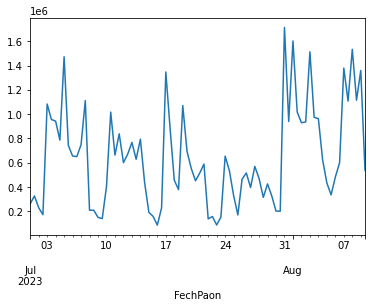

In [38]:
pagos.resample('12h').sum()['ImpoPaon'].plot()

<AxesSubplot:>

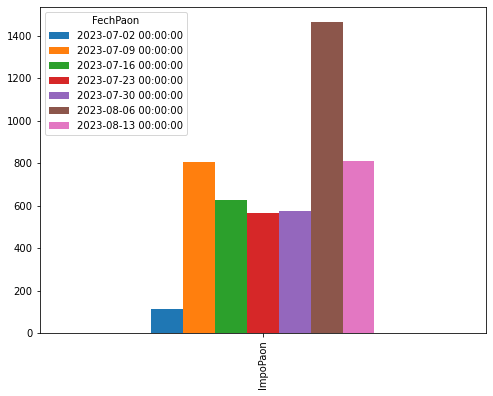

In [39]:
pagos.resample('W').count()[['ImpoPaon']].T.plot(kind = 'bar', figsize = (8,6))

También podemos pasar diferentes funciones a las diferentes columnas con el método <code>.agg</code> como con los <code>groupby</code>.

In [40]:
pagos.resample('W').agg({'CodiPaon':'count', 'ImpoPaon':'sum'})

,CodiPaon,ImpoPaon
FechPaon,,
2023-07-02,112,994216.82
2023-07-09,804,9862571.45
2023-07-16,626,7491045.73
2023-07-23,567,7484807.78
2023-07-30,575,5586551.29
2023-08-06,1462,13064648.97
2023-08-13,810,7031732.60


 ## **<font color="lightblue">Otras formas de agrupar los datos</font>**


<p align="justify">
Tal vez estemos interesados en saber en que hora del día es cuando se producen más cantidad de pagos. Bueno para realizarlo podemos utilizar <code>groupby</code> y luego le pasamos las horas de nuestro índice con el atributo <code>.hours</code>

<AxesSubplot:xlabel='FechPaon'>

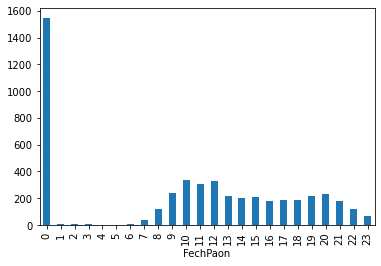

In [41]:
pagos.groupby(pagos.index.hour).size().plot(kind = 'bar')

<p align="justify">
Al parecer tenemos un error con la hora 0, probablemente son valores que vinieron sin hora específica. Podemos también agrupar con alguna serie del dataframe que sea temporal, pero cuando no es índice necesitamos utilizar primero el atributo <code>.dt</code>.

<AxesSubplot:xlabel='AltaPago'>

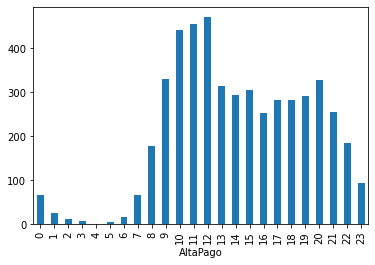

In [42]:
pagos.groupby(pagos.AltaPago.dt.hour).size().plot(kind = 'bar')

<p align="justify">
También podemos saber en que día de la semana se produce el evento. Para esto podemos usar el método <code>.day_name</code>.

<AxesSubplot:xlabel='FechPaon'>

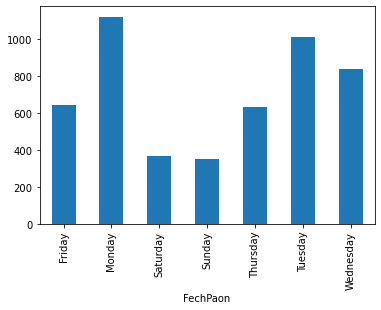

In [43]:
pagos.groupby(pagos.index.day_name()).size().plot(kind = 'bar')

Por supuesto también lo podemos hacer con una serie

<AxesSubplot:xlabel='AltaPago'>

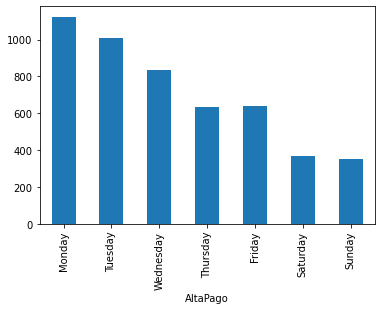

In [44]:
pagos['day'] = pagos.AltaPago.dt.day_of_week
pagos.groupby(pagos.AltaPago.dt.day_name()).agg({'day':'first', 'ImpoPaon':'count'}).sort_values('day')['ImpoPaon'].plot(kind = 'bar')


 # **<font color="lightblue">Conclusiones</font>**

<p align="justify">
En este notebook nosotros:<br><br>
✅ Generamos objetos de tipo datetime con datetime y pandas.<br>
✅ Trabajamos con distintas formas de filtrado del tiempo.<br>
✅ Agrupamos los valores para mostrar información más ordenada. <br>

<p align="justify">
